In [1]:
import numpy as np
import pandas as pd
import random as rn
import tensorflow as tf
import keras
import warnings
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
mnist = loadmat('./Data/mnist-original.mat')


In [3]:
x = mnist['data'].T
y = mnist['label'][0]

In [4]:
print('MNIST data shape - {0}'.format(x.shape))
print('MNIST label shape - {0}'.format(y.shape))

MNIST data shape - (70000, 784)
MNIST label shape - (70000,)


In [5]:
img_height = 28
img_width = 28
channels = 1

input_shape = (img_height, img_width, channels)
num_classes = 10

epoch = 20
batch_size = 128

In [6]:
x_reshape = x.reshape(x.shape[0], img_height, img_width, channels)

print(x_reshape.shape)

(70000, 28, 28, 1)


In [7]:
y_encoded = keras.utils.to_categorical(y, num_classes)

print(y_encoded.shape)

(70000, 10)


In [8]:
idx = rn.sample(range(0, len(y_encoded)), 10)
y_random = []
for i in idx:
    y_random.append([int(x) for x in y_encoded[i]])

y_random

[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]]

In [9]:
x_reshape = x_reshape.astype('float32')
x_reshape /= 255

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_reshape, y_encoded, test_size = 0.25, random_state = 0)

In [11]:
print('training data shape : image - {0}, label - {1}'.format(x_train.shape, y_train.shape))
print('test data shape : image - {0}, label - {1}'.format(x_test.shape, y_test.shape))

training data shape : image - (52500, 28, 28, 1), label - (52500, 10)
test data shape : image - (17500, 28, 28, 1), label - (17500, 10)


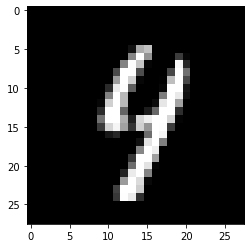

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

idx = rn.randint(0, x_train.shape[0])
plt.imshow(x_train[idx][:,:,0],"gray") 

In [13]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.25, random_state = 0)

In [14]:
print('training data shape : image - {0}, label - {1}'.format(x_train.shape, y_train.shape))
print('validation data shape : image - {0}, label - {1}'.format(x_validation.shape, y_validation.shape))

training data shape : image - (39375, 28, 28, 1), label - (39375, 10)
validation data shape : image - (13125, 28, 28, 1), label - (13125, 10)


In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [16]:
# model
model = Sequential()

# first conv layer
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(num_classes, activation='softmax'))

# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [17]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [18]:
model.fit(x_train, 
         y_train,
         batch_size = batch_size,
         epochs = epoch,
         verbose = 1,
         validation_data=(x_validation, y_validation))

Train on 39375 samples, validate on 13125 samples
Epoch 1/20
10752/39375 [=======>......................] - ETA: 40s - loss: 0.6974 - accuracy: 0.7819

KeyboardInterrupt: 